In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [3]:
x_train,x_test,y_train,y_test=train_test_split(housing.data,housing.target)

In [4]:
tf.random.set_seed(42)

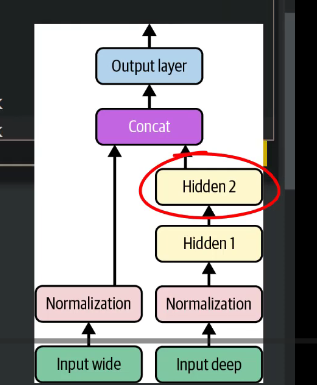

In [1]:
from PIL import Image
Image.open(r'/content/layers.png')

In [12]:
input_deep=tf.keras.layers.Input(shape=[6])
input_wide=tf.keras.layers.Input(shape=[6])

norm_layres_wide=tf.keras.layers.Normalization()
norm_layers_deep=tf.keras.layers.Normalization()
norm_wide=norm_layres_wide(input_wide)
norm_deep=norm_layers_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.Concatenate()
output=tf.keras.layers.Dense(1)
output=output(concat([norm_wide,hidden2]))
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

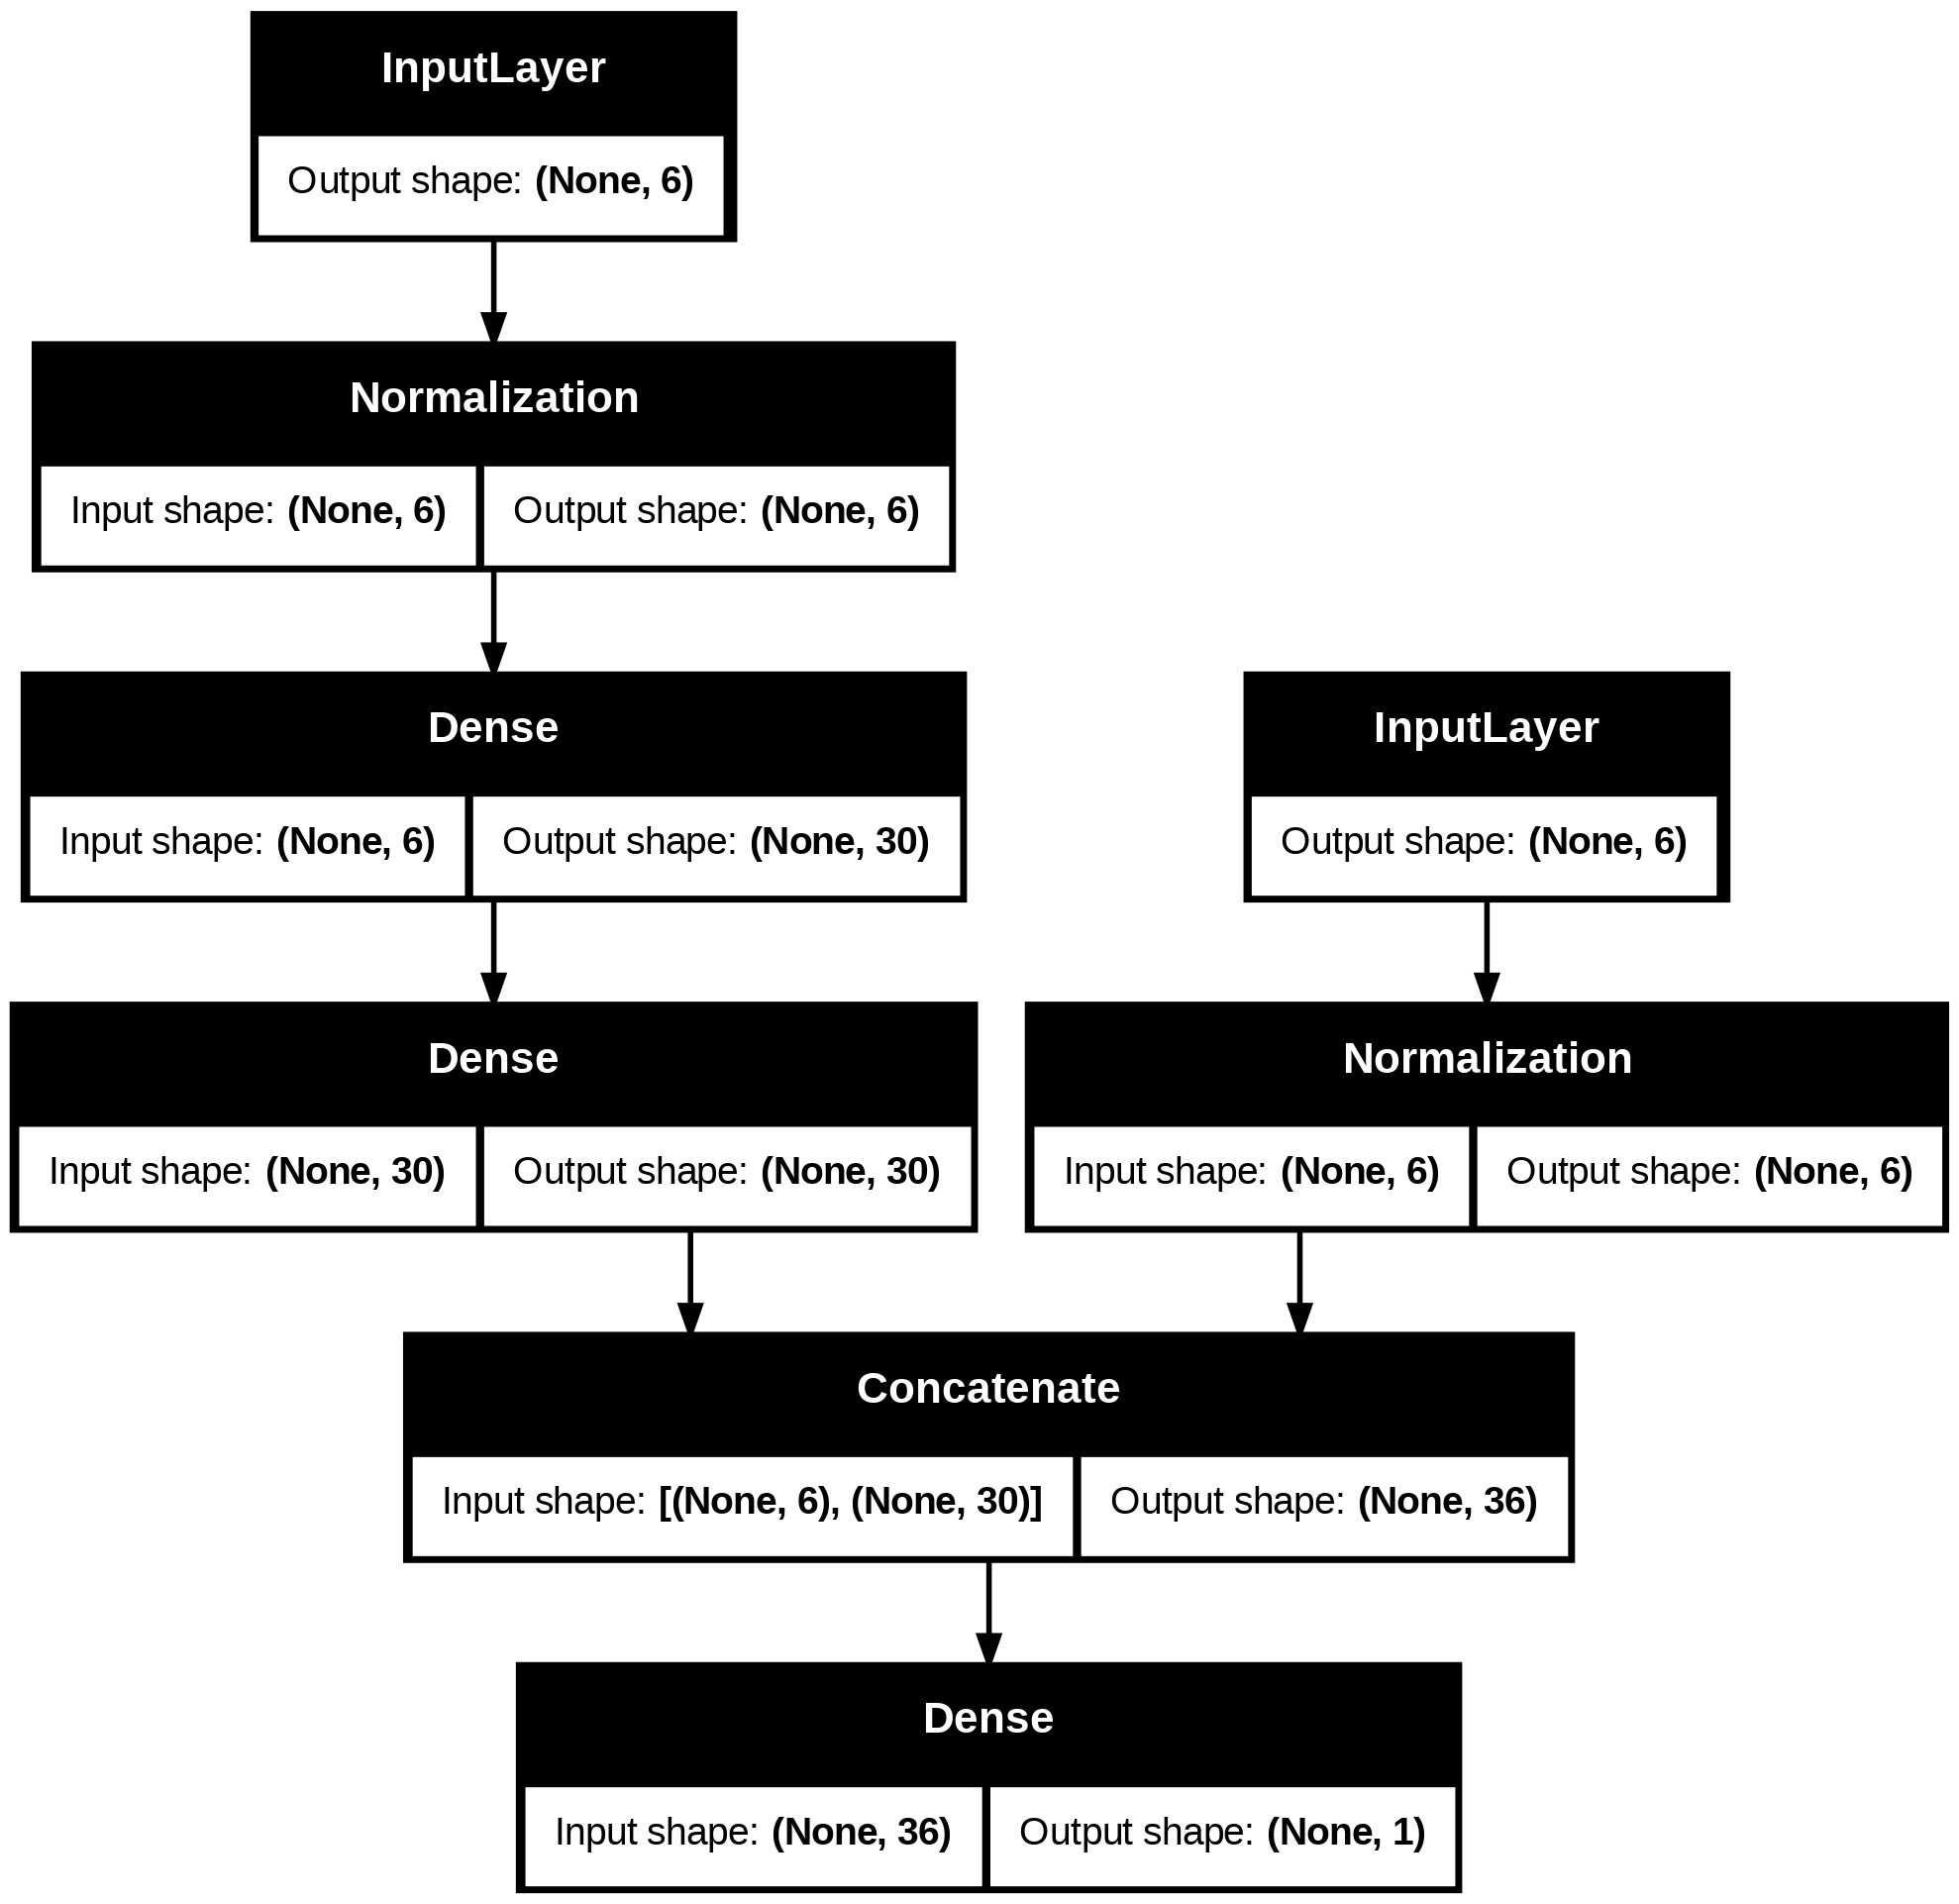

In [13]:
tf.keras.utils.plot_model(model,"my_model.png",show_shapes=True)

In [14]:
optimizers=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizers)

In [17]:
x_train_wide,x_train_deep=x_train[:,:6],x_train[:,2:]
x_test_wide,x_test_deep=x_test[:,:6],x_test[:,2:]

In [18]:
norm_layers_deep.adapt(x_train_deep)
norm_layres_wide.adapt(x_train_wide)

In [19]:
history=model.fit((x_train_wide,x_train_deep),y_train,epochs=20,validation_split=0.2)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3947 - val_loss: 0.9019
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8755 - val_loss: 0.6657
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6747 - val_loss: 0.5939
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6167 - val_loss: 0.5724
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5975 - val_loss: 0.5456
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5752 - val_loss: 0.5364
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5652 - val_loss: 0.5201
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5507 - val_loss: 0.5151
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5439 - val_loss: 0.5044
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5342 - val_loss: 0.5013
Epoch 11/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5295 - val_loss: 0.4935
Epoch 12/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [20]:
## model evaluation
test_scores=model.evaluate((x_test_wide,x_test_deep),y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4790


In [21]:
x_new_wide,x_new_deep=x_test_wide[:3],x_test_deep[:3]
y_pred=model.predict((x_new_wide,x_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[2.0122476],
       [1.7953947],
       [1.6237504]], dtype=float32)

In [22]:
y_test[:3]

array([3.056, 1.188, 1.788])